<a href="https://colab.research.google.com/github/udupa-varun/pyimagesearch_uni/blob/main/deep_learning/103/feedforward_neural_networks_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/feedforward-neural-networks-keras/feedforward-neural-networks-keras.zip
!unzip -qq feedforward-neural-networks-keras.zip
%cd feedforward-neural-networks-keras

--2023-02-10 12:14:10--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/feedforward-neural-networks-keras/feedforward-neural-networks-keras.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.153.249, 52.218.218.41, 3.5.83.207, ...
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.153.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2862 (2.8K) [binary/octet-stream]
Saving to: ‘feedforward-neural-networks-keras.zip’

feedforward-neural- 100%[===================>]   2.79K  --.-KB/s    in 0s      

2023-02-10 12:14:10 (98.6 MB/s) - ‘feedforward-neural-networks-keras.zip’ saved [2862/2862]

/content/feedforward-neural-networks-keras


In [3]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10, mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# grab MNIST dataset
print("[INFO] accessing MNIST...")
((train_x, train_y), (test_x, test_y)) = mnist.load_data()

# each image is represented as 28x28x1 image,
# first flatten to 784-dim
train_x = train_x.reshape((train_x.shape[0], 28 * 28 * 1))
test_x = test_x.reshape((test_x.shape[0], 28 * 28 * 1))

# scale data to [0, 1]
train_x = train_x.astype("float32") / 255.0
test_x = test_x.astype("float32") / 255.0

[INFO] accessing MNIST...
11490434/11490434 [==============================] - 0s 0us/step


In [5]:
# convert labels from integers to vectors
lb = LabelBinarizer()
train_y = lb.fit_transform(train_y)
test_y = lb.fit_transform(test_y)

In [6]:
# define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [7]:
# train model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=100, batch_size=128)

[INFO] training network...
Epoch 1/100
469/469 [==============================] - 6s 13ms/step - loss: 2.2807 - accuracy: 0.2117 - val_loss: 2.2345 - val_accuracy: 0.3783
Epoch 2/100
469/469 [==============================] - 4s 7ms/step - loss: 2.1998 - accuracy: 0.4111 - val_loss: 2.1548 - val_accuracy: 0.5414
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 2.1067 - accuracy: 0.5258 - val_loss: 2.0422 - val_accuracy: 0.5980
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 1.9712 - accuracy: 0.5871 - val_loss: 1.8775 - val_accuracy: 0.6278
Epoch 5/100
469/469 [==============================] - 4s 8ms/step - loss: 1.7828 - accuracy: 0.6361 - val_loss: 1.6626 - val_accuracy: 0.6703
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 1.5596 - accuracy: 0.6781 - val_loss: 1.4341 - val_accuracy: 0.7085
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 1.3449 - accuracy: 0.7150 - val_loss: 1

In [8]:
# evaluate network
print("[INFO] evaluating network...")
predictions = model.predict(test_x, batch_size=128)
print(classification_report(
    test_y.argmax(axis=1), 
    predictions.argmax(axis=1), 
    target_names=[str(x) for x in lb.classes_])
)

[INFO] evaluating network...
79/79 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.92      0.91      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.92      0.93      0.93       982
           5       0.90      0.86      0.88       892
           6       0.93      0.94      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.90      0.88      0.89       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



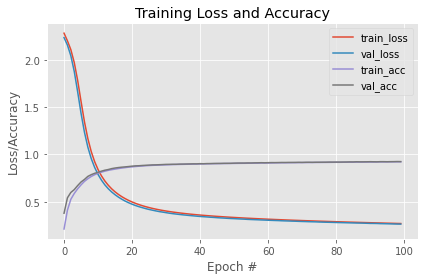

In [9]:
# plot training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.tight_layout()

plt.show()

## CIFAR10

In [10]:
# grab CIFAR10 dataset
print("[INFO] accessing CIFAR-10 data...")
((train_x, train_y), (test_x, test_y)) = cifar10.load_data()

# first flatten to 3072-dim
train_x = train_x.reshape((train_x.shape[0], 32 * 32 * 3))
test_x = test_x.reshape((test_x.shape[0], 32 * 32 * 3))

# scale data to [0, 1]
train_x = train_x.astype("float") / 255.0
test_x = test_x.astype("float") / 255.0

[INFO] accessing CIFAR-10 data...
170498071/170498071 [==============================] - 4s 0us/step


In [12]:
# convert labels from integers to vectors
lb = LabelBinarizer()
train_y = lb.fit_transform(train_y)
test_y = lb.fit_transform(test_y)

# init label names for CIFAR-10 dataset
label_names = [
    "airplane", 
    "automobile", 
    "bird", 
    "cat", 
    "deer", 
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
    ]

In [14]:
# define the 3072-1024-512-10 architecture using Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [15]:
# train model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=100, batch_size=32)

[INFO] training network...
Epoch 1/100
1563/1563 [==============================] - 66s 42ms/step - loss: 1.8369 - accuracy: 0.3459 - val_loss: 1.7584 - val_accuracy: 0.3827
Epoch 2/100
1563/1563 [==============================] - 48s 31ms/step - loss: 1.6484 - accuracy: 0.4175 - val_loss: 1.6677 - val_accuracy: 0.4110
Epoch 3/100
1563/1563 [==============================] - 44s 28ms/step - loss: 1.5686 - accuracy: 0.4457 - val_loss: 1.5609 - val_accuracy: 0.4421
Epoch 4/100
1563/1563 [==============================] - 42s 27ms/step - loss: 1.5091 - accuracy: 0.4656 - val_loss: 1.6276 - val_accuracy: 0.4306
Epoch 5/100
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4663 - accuracy: 0.4836 - val_loss: 1.4921 - val_accuracy: 0.4709
Epoch 6/100
1563/1563 [==============================] - 41s 27ms/step - loss: 1.4238 - accuracy: 0.4976 - val_loss: 1.5178 - val_accuracy: 0.4526
Epoch 7/100
1563/1563 [==============================] - 43s 28ms/step - loss: 1.3893 - acc

In [16]:
# evaluate network
print("[INFO] evaluating network...")
predictions = model.predict(test_x, batch_size=32)
print(classification_report(
    test_y.argmax(axis=1),
    predictions.argmax(axis=1),
    target_names=label_names
))

[INFO] evaluating network...
313/313 [==============================] - 4s 13ms/step
              precision    recall  f1-score   support

    airplane       0.62      0.70      0.66      1000
  automobile       0.69      0.64      0.67      1000
        bird       0.47      0.41      0.44      1000
         cat       0.37      0.40      0.39      1000
        deer       0.53      0.48      0.51      1000
         dog       0.43      0.48      0.45      1000
        frog       0.63      0.63      0.63      1000
       horse       0.65      0.61      0.63      1000
        ship       0.68      0.69      0.69      1000
       truck       0.60      0.62      0.61      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.57     10000
weighted avg       0.57      0.57      0.57     10000



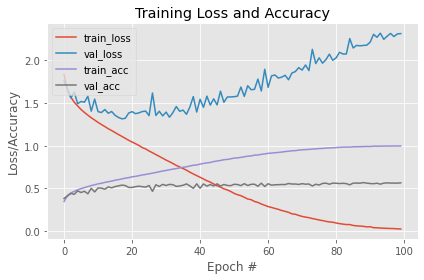

In [17]:
# plot training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.tight_layout()

plt.show()